#Dia 3

###Dados tabulares e MatPlotLib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Usaremos como base o conjunto de dados do Material Suplementar (S4) intitulado como "metabolites_data.xlsx" do artigo abaixo para analisar os metabólitos de *Arabidopsis* ao longo de seu ciclo diuturno (24 horas):

[Annunziata, M. G., Apelt, F., Carillo, P., Krause, U., Feil, R., Koehl, K., ... & Stitt, M. (2018). Response of Arabidopsis primary metabolism and circadian clock to low night temperature in a natural light environment. Journal of Experimental Botany, 69(20), 4881-4895.](https://academic.oup.com/jxb/article/69/20/4881/5059140)

Arquivo: https://docs.google.com/spreadsheets/d/1qSVEsqwMRUc6pYy6uAvqEJsp3x_N-Q72/edit?usp=share_link&ouid=104040590536046854872&rtpof=true&sd=true

3 regimes de crescimento:

*   Luz e temperatura controlados (LT) - controlled-environment chamber
*   Luz naturalmente variável e temperatura controlada (L<sup>VAR</sup>T) - naturally illuminated glasshouse
*   Luz naturalmente variável e temperatura variável (L<sup>VAR</sup>T<sup>VAR</sup>) - naturally illuminated greenhouse


Coleta: aos 28 DAS; 4 réplicas a cada 2h durante 24h, com coleta mais frequente (0.5-1h) durante nascer e por do sol.







In [ ]:
# importar tabela do regime LT (aba LT)
metabolites_LT_df = pd.read_excel("/content/drive/MyDrive/Organização do I Workshop de Python para Dados de Biologia Vegetal/Cadernos de Atividade Prática   Aulas/Dia 3/metabolite_data.xlsx", sheet_name="LT")

display(metabolites_LT_df) #deixar o parâmetro de importação de aba (sheet_name="") para mostrar como importar uma aba específica da planilha desejada

,Time of the day,ZT (h),Starch (µmol/g FW),Sucrose (hexoses/g FW),Glucose+Fructose (hexoses/g FW),ADPGlc (nmol/g FW),UDPGlc (nmol/g FW),Tre6P (nmol/g FW),Suc6P (nmol/g FW),Fru6P (nmol/g FW),FBP (nmol/g FW),Glc1P (nmol/g FW),Glc6P (nmol/g FW),"G1,6BP (nmol/g FW)",Gal1P (nmol/g FW),Man6P (nmol/g FW)
0,06:00:00,-0.5,3.606214,1.947235,2.621278,0.030917,66.500000,0.097806,0.225556,29.944444,0.523056,9.586111,50.166667,1.351389,2.547222,28.583333
1,06:00:00,-0.5,4.235871,2.030450,2.779387,0.049000,65.902439,0.076829,0.242439,30.219512,0.373902,9.441463,55.829268,1.000488,2.526829,30.731707
2,06:00:00,-0.5,4.801959,2.937408,3.227522,0.042821,75.279330,0.090140,0.250279,34.804469,0.473184,11.282123,61.983240,0.969832,2.952514,33.435754
3,06:00:00,-0.5,2.846081,2.837148,2.870923,0.042358,71.392045,0.070994,0.250568,33.607955,0.737784,9.843750,64.232955,1.592898,2.744318,35.198864
4,06:40:00,0.0,1.814710,2.498479,2.141554,0.035541,69.278351,0.104820,0.185825,29.046392,0.824485,9.796392,51.597938,1.165464,2.435567,28.685567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,05:30:00,23.0,5.595356,2.258460,3.961874,0.037663,77.989130,0.100054,0.388043,43.750000,0.450815,13.809783,70.190217,2.016304,3.385870,39.184783
132,06:20:00,24.0,3.554697,3.004900,3.234574,0.040486,77.567568,0.070000,0.278108,35.756757,0.402973,11.200000,63.756757,1.424595,2.989189,34.054054
133,06:20:00,24.0,2.063588,NaN,NaN,0.051346,90.961538,0.086923,0.375000,41.538462,0.411538,14.500000,66.346154,2.076923,3.903846,36.730769
134,06:20:00,24.0,2.947211,2.185982,3.585011,0.022539,72.748691,0.077330,0.302356,39.581152,0.251047,11.196335,72.565445,0.940052,2.858639,33.167539


In [ ]:
# informação sobre os dados de LT
metabolites_LT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time of the day                  136 non-null    object 
 1   ZT (h)                           136 non-null    float64
 2   Starch (µmol/g FW)               126 non-null    float64
 3   Sucrose (hexoses/g FW)           129 non-null    float64
 4   Glucose+Fructose (hexoses/g FW)  129 non-null    float64
 5   ADPGlc (nmol/g FW)               135 non-null    float64
 6   UDPGlc (nmol/g FW)               135 non-null    float64
 7   Tre6P (nmol/g FW)                135 non-null    float64
 8   Suc6P (nmol/g FW)                135 non-null    float64
 9   Fru6P (nmol/g FW)                135 non-null    float64
 10  FBP (nmol/g FW)                  135 non-null    float64
 11  Glc1P (nmol/g FW)                135 non-null    float64
 12  Glc6P (nmol/g FW)     

In [ ]:
# estatística descritiva dos dados de LT
metabolites_LT_df.describe()

,ZT (h),Starch (µmol/g FW),Sucrose (hexoses/g FW),Glucose+Fructose (hexoses/g FW),ADPGlc (nmol/g FW),UDPGlc (nmol/g FW),Tre6P (nmol/g FW),Suc6P (nmol/g FW),Fru6P (nmol/g FW),FBP (nmol/g FW),Glc1P (nmol/g FW),Glc6P (nmol/g FW),"G1,6BP (nmol/g FW)",Gal1P (nmol/g FW),Man6P (nmol/g FW)
count,136.000000,126.000000,129.000000,129.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,10.250000,32.618716,5.077763,4.256989,0.763735,90.863467,0.302529,0.606616,56.971917,4.021656,14.043487,92.123537,2.339908,3.179959,29.018312
std,7.234946,23.520689,1.777420,1.208116,1.064159,16.408593,0.211242,0.254985,21.546814,6.235974,2.780218,21.229189,0.917102,0.568045,5.256778
min,-0.500000,0.960729,1.926129,2.141554,0.022539,56.700000,0.064385,0.185825,27.815789,0.251047,8.516667,50.166667,0.940052,1.837500,19.833333
25%,3.500000,9.610327,3.891438,3.278897,0.043896,78.923023,0.134792,0.409907,41.831246,0.830055,12.175801,76.337596,1.696801,2.846393,24.985380
50%,9.750000,32.870732,5.028392,4.154830,0.129480,90.921788,0.229798,0.558056,52.411168,1.207673,13.809783,92.548077,2.185083,3.122159,28.290155
75%,16.000000,54.636964,6.289530,5.106687,1.342103,101.255181,0.448125,0.811560,63.912136,3.843305,15.388330,106.939073,2.725727,3.509067,33.111547
max,24.000000,80.243992,9.666653,7.587959,4.796296,140.184211,0.824299,1.280263,140.686275,32.800000,23.800000,142.722222,6.220000,5.061275,43.212291


In [ ]:
# verificar se existem valores faltantes
metabolites_LT_df.isnull().sum()

Time of the day                     0
ZT (h)                              0
Starch (µmol/g FW)                 10
Sucrose (hexoses/g FW)              7
Glucose+Fructose (hexoses/g FW)     7
ADPGlc (nmol/g FW)                  1
UDPGlc (nmol/g FW)                  1
Tre6P (nmol/g FW)                   1
Suc6P (nmol/g FW)                   1
Fru6P (nmol/g FW)                   1
FBP (nmol/g FW)                     1
Glc1P (nmol/g FW)                   1
Glc6P (nmol/g FW)                   1
G1,6BP (nmol/g FW)                  1
Gal1P (nmol/g FW)                   1
Man6P (nmol/g FW)                   1
dtype: int64

In [ ]:
# verificar se existem NaN ou NA
metabolites_LT_df.isna().sum()

Time of the day                     0
ZT (h)                              0
Starch (µmol/g FW)                 10
Sucrose (hexoses/g FW)              7
Glucose+Fructose (hexoses/g FW)     7
ADPGlc (nmol/g FW)                  1
UDPGlc (nmol/g FW)                  1
Tre6P (nmol/g FW)                   1
Suc6P (nmol/g FW)                   1
Fru6P (nmol/g FW)                   1
FBP (nmol/g FW)                     1
Glc1P (nmol/g FW)                   1
Glc6P (nmol/g FW)                   1
G1,6BP (nmol/g FW)                  1
Gal1P (nmol/g FW)                   1
Man6P (nmol/g FW)                   1
dtype: int64

<div align="left">
<img src="https://matplotlib.org/stable/_static/images/logo_dark.svg" width="600"/>
</div>

# Matplotlib

Matplotlib é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para e da linguagem de programação Python e sua extensão de matemática NumPy.


 * Tipos de gráficos (linhas, barras, pizza, box plot, etc.)
 * Cuidados e como tratar as escalas dos elementos apresentados no gráfico (dimensionamento dos elementos)
 * Posicionamento ideal de legendas (fora ou dentro da área do gráfico)

Repositório com códigos de modelos de gráficos do MatPlotLib: https://matplotlib.org/stable/gallery/index.html




##1. Gráfico de linhas

Usado para representar dados contínuos em uma série de pontos, como por exemplo, a variação de medições dentro de uma série temporal. No nosso caso, estudaremos o acúmulo de metabólitos (Sucrose-6-phosphate e Fructose-6-phosphate) do ciclo energético de *Arabidopsis thaliana* em diferentes pontos de medição (ZT, em horas),

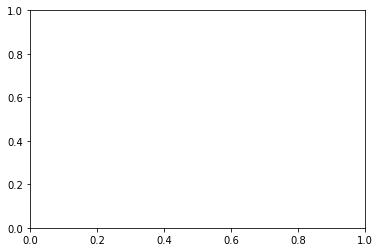

In [ ]:
#Criando um gráfico em branco

fig, ax1 = plt.subplots()
plt.show()

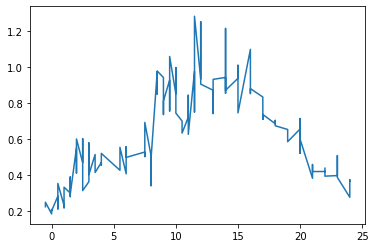

In [ ]:
#Eixo x: inserindo o valor da série contínua

x = "ZT (h)"
y = "Suc6P (nmol/g FW)"

fig, ax1 = plt.subplots()
ax1.plot(x, y, data=metabolites_LT_df)
plt.show()

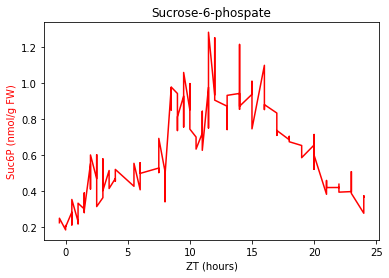

In [ ]:
#Inserindo título, nome dos eixos e cores ao gráfico anterior

fig, ax1 = plt.subplots()
ax1.plot(x, y, data=metabolites_LT_df, color="red")
plt.title('Sucrose-6-phospate')
ax1.set_xlabel("ZT (hours)")
ax1.set_ylabel(y, color="red")
plt.show()

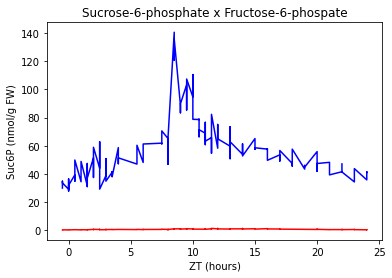

In [ ]:
#Gráfico com duas variáveis (usando os valores de Sucrose e Frutose)

y2 = "Fru6P (nmol/g FW)"

fig, ax1 = plt.subplots()
ax1.plot(x, y, data=metabolites_LT_df, color="red")
ax1.plot(x, y2, data=metabolites_LT_df, color="blue")
plt.title('Sucrose-6-phosphate x Fructose-6-phospate')
ax1.set_xlabel("ZT (hours)")
ax1.set_ylabel(y)
ax2.set_ylabel(y2)
plt.show()

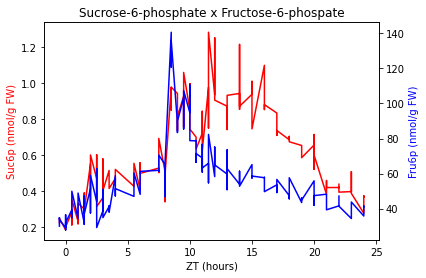

In [ ]:
#Gráfico com dois eixos Y independentes (usando os valores de Sucrose e Frutose - amplitude de valores diferentes)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, data=metabolites_LT_df, color="red")
ax2.plot(x, y2, data=metabolites_LT_df, color="blue")
plt.title("Sucrose-6-phosphate x Fructose-6-phospate")
ax1.set_xlabel("ZT (hours)")
ax1.set_ylabel("Suc6p (nmol/g FW)", color="red")
ax2.set_ylabel("Fru6p (nmol/g FW)", color="blue")

plt.show()

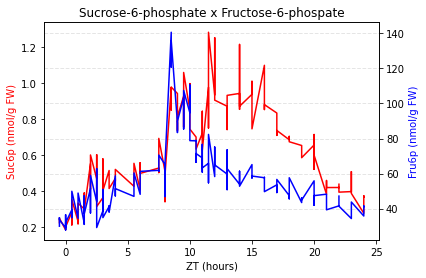

In [ ]:
#Gráfico com dois eixos Y independentes e grid

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, data=metabolites_LT_df, color="red")
ax2.plot(x, y2, data=metabolites_LT_df, color="blue")
plt.title("Sucrose-6-phosphate x Fructose-6-phospate")
ax1.set_xlabel("ZT (hours)")
ax1.set_ylabel("Suc6p (nmol/g FW)", color="red")
ax2.set_ylabel("Fru6p (nmol/g FW)", color="blue")
plt.grid(color='k', ls='--', linewidth=1, axis='y', alpha=0.1)
plt.show()

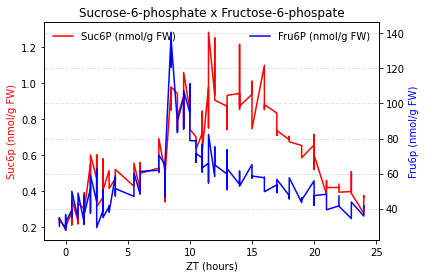

In [ ]:
#Inserindo legenda no gráfico

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, data=metabolites_LT_df, color="red")
ax2.plot(x, y2, data=metabolites_LT_df, color="blue")
ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)
plt.title("Sucrose-6-phosphate x Fructose-6-phospate")
ax1.set_xlabel("ZT (hours)")
ax1.set_ylabel("Suc6p (nmol/g FW)", color="red")
ax2.set_ylabel("Fru6p (nmol/g FW)", color="blue")
plt.grid(color='k', ls='--', linewidth=1, axis='y', alpha=0.1)

plt.show()

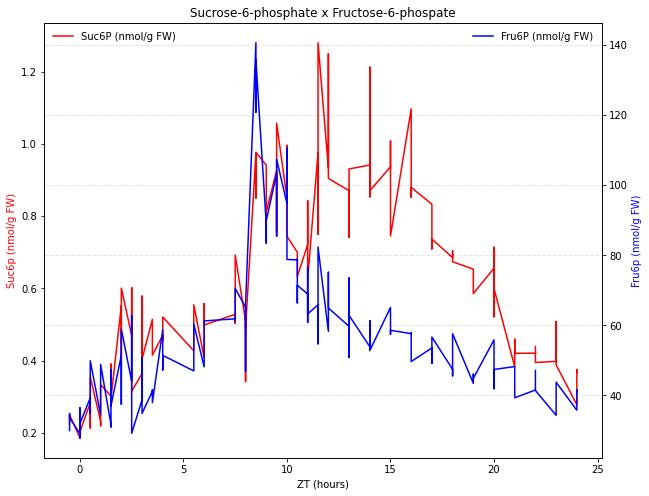

In [ ]:
#Alterando tamanho do gráfico

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, data=metabolites_LT_df, color="red")
ax2.plot(x, y2, data=metabolites_LT_df, color="blue")
ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)
plt.title("Sucrose-6-phosphate x Fructose-6-phospate")
ax1.set_xlabel("ZT (hours)")
ax1.set_ylabel("Suc6p (nmol/g FW)", color="red")
ax2.set_ylabel("Fru6p (nmol/g FW)", color="blue")
plt.grid(color='k', ls='--', linewidth=1, axis='y', alpha=0.1)
fig.set_size_inches(10, 8)


##2. Gráfico de barras

Gráficos de barras são ideais para comparar valores absolutos de categorias de variáveis de uma mesma classe. No nosso exemplo, faremos a comparação das concentrações em Nanomol por Grama em Peso Fresco (nmol/g FW) de 11 metabólitos (ADPGlc, UDPGlc, Tre6P,	Suc6P, Fru6P,	FBP,	Glc1P,	Glc6P, G1, 6BP,	Gal1P e	Man6P) em um mesmo ZT (ToD: 07h40, ZT = 1).

In [ ]:
#Fatiando nosso dataframe para separar os valores de interesse e inserindo os valores obtidos em um novo objeto:

metabolites_zt1 = metabolites_LT_df.iloc[12:16,5:16].mean()
display(metabolites_zt1)

NameError: ignored

In [ ]:
#Extraindo os valores dos eixos x (nomes dos metabólitos) e y (valores de cada medição)

metab_names=["ADPGlc", "UDPGlc", "Tre6P", "Suc6P", "Fru6P", "FBP", "Glc1P", "Glc6P", "G1,6BP", "Gal1P", "Man6P"]
metab_values=[0.947364, 76.846817, 0.119479, 0.273734, 40.906046, 0.856539, 11.579589, 72.919043, 2.389579, 2.588266, 29.137405]
positions = range(len(metab_names))

In [ ]:
#Criando um gráfico de barras inicial com os dados

fig, ax = plt.subplots()
plt.bar(positions, metab_values)
plt.show()


NameError: ignored

In [ ]:
#Inserindo títulos e rótulos dos eixos x e y

fig, ax = plt.subplots()
plt.bar(positions, metab_values)
plt.xticks(positions, metab_names)
plt.title("Mean Metabol. Conc. (nmol/g FW) on ZT 1 (07H40)")
plt.xlabel("Metabolites")
plt.ylabel("[nmol/g FW]")
plt.show()

In [ ]:
#Mudando as cores das barras do gráfico

cores = ['r', 'g', 'b', 'k', 'y', 'm', 'c'] #pode passar uma lista com nomes de cores via lista para o plot

fig, ax = plt.subplots()
plt.bar(positions, metab_values, color = cores)
plt.xticks(positions, metab_names)
plt.title("Mean Metabol. Conc. (nmol/g FW) on ZT 1 (07H40)")
plt.xlabel("Metabolites")
plt.ylabel("[nmol/g FW]")
plt.show()

In [ ]:
#Ajustando tamanho e legendas do gráfico

cores = ['r', 'g', 'b', 'k', 'y', 'm', 'c'] #pode passar uma lista com nomes de cores via lista para o plot

fig, ax = plt.subplots()
plt.bar(positions, metab_values, color = cores)
plt.xticks(positions, metab_names)
plt.title("Mean Metabol. Conc. (nmol/g FW) on ZT 1 (07H40)")
plt.xlabel("Metabolites")
plt.ylabel("[nmol/g FW]")
plt.xticks(rotation=45)
fig.set_size_inches(10, 8)
plt.show()

In [ ]:
#Ajustando escala do eixo Y, tamanho e legendas do gráfico

cores = ['r', 'g', 'b', 'k', 'y', 'm', 'c'] #pode passar uma lista com nomes de cores via lista para o plot

fig, ax = plt.subplots()
plt.bar(positions, metab_values, color = cores)
plt.xticks(positions, metab_names)
plt.title("Mean Metabol. Conc. (nmol/g FW) on ZT 1 (07H40)")
plt.xlabel("Metabolites")
plt.ylabel("[nmol/g FW]")
plt.xticks(rotation=45)
ax.set_yscale('log')
fig.set_size_inches(10, 8)
plt.show()


##3. Gráfico de pizza

Gráficos de pizza são usados para comparar proporções de categorias de variáveis de uma mesma classe. No nosso exemplo, veremos as proporções das concentrações em Nanomol por Grama em Peso Fresco (nmol/g FW) de 11 metabólitos (ADPGlc, UDPGlc, Tre6P,	Suc6P, Fru6P,	FBP,	Glc1P,	Glc6P, G1, 6BP,	Gal1P e	Man6P) em um mesmo ZT (ToD: 07h40, ZT = 1). Usaremos o mesmo dataset do exemplo anterior.

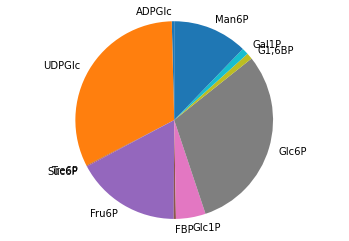

In [ ]:
## Preparando a pizza! (As fatias são orientadas em sentido anti-horário)

fig, ax1 = plt.subplots()
ax1.pie(metab_values, labels=metab_names, startangle=90)
ax1.axis('equal')
plt.show()

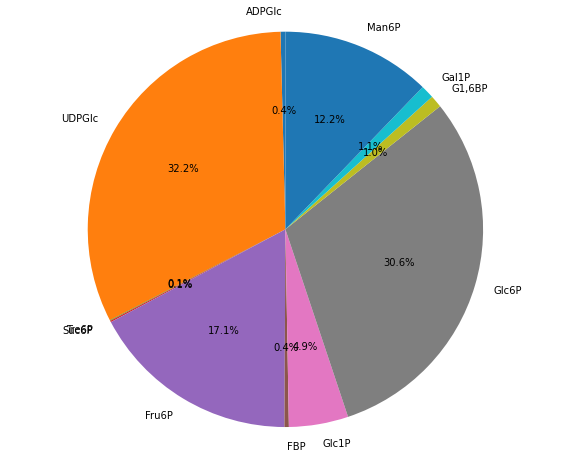

In [ ]:
#Adicionando mais elementos no gráfico:

fig, ax1 = plt.subplots()
ax1.pie(metab_values, labels=metab_names, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
fig.set_size_inches(10, 8)

plt.show()

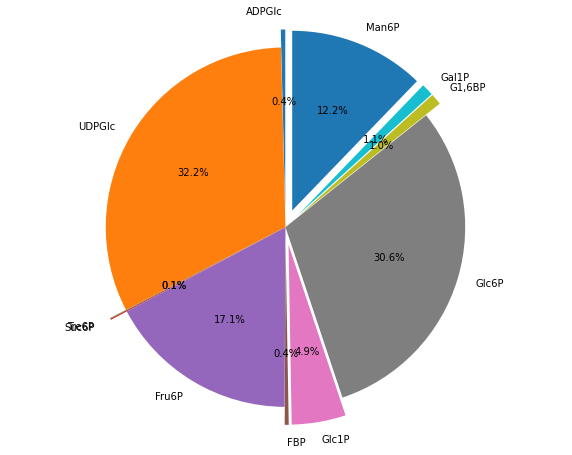

In [ ]:
fig, ax1 = plt.subplots()
explode = (0.1, 0, 0.1, 0.1, 0, 0.1, 0.1, 0, 0.1, 0.1, 0.1)
ax1.pie(metab_values, labels = metab_names, explode = explode, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
fig.set_size_inches(10, 8)

plt.show()


##4. Diagrama de caixa ou *boxplot*

Diagramas de caixa ou *boxplots* são gráficos que representam a variação de dados observados de uma variável numérica por meio de quartis. No nosso exemplo, veremos as proporções das concentrações dos vários metabólitos ao longo de todo o experimento.

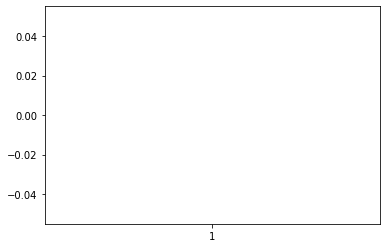

In [ ]:
#Montando o boxplot

plt.boxplot(x=metabolites_LT_df['Starch (µmol/g FW)'], vert=True);

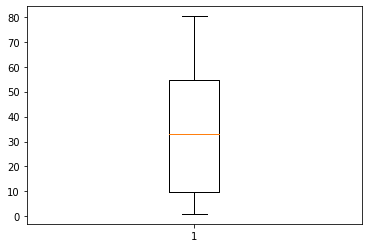

In [ ]:
#Por que não fuincionou? Será que existem valores faltando?

plt.boxplot(x=metabolites_LT_df['Starch (µmol/g FW)'].dropna(), vert=True);